# 2.4: Evaluating Hyperparameters
## Part 1: Random Forest

### 1. Importing Libraries and Data

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)

In [64]:
#Create a path to where your data is stored.
path = r'C:\Users\IVON6\ClimateWins'

In [66]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))
climate_clean = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'climate_clean.csv'))
answers_clean = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'answers_clean.csv'))

In [67]:
climate.shape

(22950, 170)

In [70]:
answers.shape

(22950, 16)

### 2. Data Wrangling

In [73]:
climate_last12years = climate.loc[climate['DATE'].astype('str').str[:4] >= '2010']
climate_last12years

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18263  20100101      1                  8              2.30            0.93   
18264  20100102      1                  3              3.00            0.74   
18265  20100103      1                  3              1.70            0.75   
18266  20100104      1                  5              1.00            0.83   
18267  20100105      1                  7              1.40            0.78   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1              2.10            0.79   
22946  20221028     10                  6              2.10            0.77   
22947  20221029     10                  4              2.10            0.76   
22948  20221030     10                  5              2.10            0.80   
22949  20221031     10                  5              2.10            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18263            1.00                    0.18                 0.56   
18264            1.02                    0.58                 0.00   
18265            1.02                    0.61                 0.00   
18266            1.02                    0.48                 0.00   
18267            1.01                    0.53                 0.04   
...               ...                     ...                  ...   
22945            1.02                    1.34                 0.22   
22946            1.02                    1.34                 0.22   
22947            1.02                    1.34                 0.22   
22948            1.02                    1.34                 0.22   
22949            1.02                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
18263                 0            0.00             2.90           -0.20   
18264                 1            5.20            -1.50           -4.20   
18265                 0            6.30            -3.20           -6.00   
18266                 0            3.70            -4.90           -8.30   
18267                 0            4.40            -4.00           -7.10   
...                 ...             ...              ...             ...   
22945                 0            7.70            15.90           11.40   
22946                 0            5.40            16.70           14.30   
22947                 0            6.10            16.70           13.10   
22948                 0            5.80            15.40           11.60   
22949                 0            3.20            13.50            9.90   

       BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  \
18263            4.80                     6               0.85   
18264            0.40                     8               0.92   
18265            1.10                     7               0.82   
18266           -3.10                     2               0.72   
18267           -1.50                     6               0.81   
...               ...                   ...                ...   
22945           21.40                     2               0.68   
22946           21.90                     0               0.68   
22947           22.40                     2               0.68   
22948           21.10                     1               0.68   
22949           19.20                     4               0.68   

       BELGRADE_pressure  BELGRADE_global_radiation  BELGRADE_precipitation  \
18263               0.99                       0.64                    2.63   
18264               1.00                       0.25                    0.74   
18265               1.02                       0.25                    0.12   
18266               1.02                       0.86                    0.00   
18267               1.01                       0.39                    1.20   
...                  ...                 

In [75]:
# Checking the last 10rows of climate DF

climate.tail()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
22945  20221027     10                  1              2.10            0.79   
22946  20221028     10                  6              2.10            0.77   
22947  20221029     10                  4              2.10            0.76   
22948  20221030     10                  5              2.10            0.80   
22949  20221031     10                  5              2.10            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
22945            1.02                    1.34                 0.22   
22946            1.02                    1.34                 0.22   
22947            1.02                    1.34                 0.22   
22948            1.02                    1.34                 0.22   
22949            1.02                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
22945                 0            7.70            15.90           11.40   
22946                 0            5.40            16.70           14.30   
22947                 0            6.10            16.70           13.10   
22948                 0            5.80            15.40           11.60   
22949                 0            3.20            13.50            9.90   

       BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  \
22945           21.40                     2               0.68   
22946           21.90                     0               0.68   
22947           22.40                     2               0.68   
22948           21.10                     1               0.68   
22949           19.20                     4               0.68   

       BELGRADE_pressure  BELGRADE_global_radiation  BELGRADE_precipitation  \
22945               1.03                       1.57                    0.18   
22946               1.03                       1.57                    0.18   
22947               1.03                       1.57                    0.18   
22948               1.02                       1.57                    0.18   
22949               1.02                       1.57                    0.18   

       BELGRADE_sunshine  BELGRADE_temp_mean  BELGRADE_temp_min  \
22945               5.70               18.20              12.10   
22946               5.70               15.90              10.60   
22947               5.70               13.40               8.60   
22948               5.70               15.00               9.10   
22949               5.70               14.40              10.40   

       BELGRADE_temp_max  BUDAPEST_cloud_cover  BUDAPEST_humidity  \
22945              24.40                     4               0.67   
22946              21.20                     4               0.67   
22947              18.20                     4               0.67   
22948              20.90                     4               0.67   
22949              18.40                     4               0.67   

       BUDAPEST_pressure  BUDAPEST_global_radiation  BUDAPEST_precipitation  \
22945               1.02                       1.41                    0.14   
22946               1.02                       1.41                    0.14   
22947               1.02                       1.41                    0.14   
22948               1.02                       1.41                    0.14   
22949               1.02                       1.41                    0.14   

       BUDAPEST_sunshine  BUDAPEST_temp_mean  BUDAPEST_temp_min  \
22945               5.40               11.70               7.90   
22946               5.40               11.70               7.90   
22947               5.40               11.70               7.90   
22948               5.40               11.70               7.90   
22949               5.40               11.70               7.90   

       BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_wind_speed  \
22945              16.2

In [77]:
climate_clean.tail()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
22945                  1            0.79            1.02   
22946                  6            0.77            1.02   
22947                  4            0.76            1.02   
22948                  5            0.80            1.02   
22949                  5            0.84            1.02   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
22945                    1.34                 0.22            7.70   
22946                    1.34                 0.22            5.40   
22947                    1.34                 0.22            6.10   
22948                    1.34                 0.22            5.80   
22949                    1.34                 0.22            3.20   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
22945            15.90           11.40           21.40                     2   
22946            16.70           14.30           21.90                     0   
22947            16.70           13.10           22.40                     2   
22948            15.40           11.60           21.10                     1   
22949            13.50            9.90           19.20                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
22945               0.68               1.03                       1.57   
22946               0.68               1.03                       1.57   
22947               0.68               1.03                       1.57   
22948               0.68               1.02                       1.57   
22949               0.68               1.02                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
22945                    0.18               5.70               18.20   
22946                    0.18               5.70               15.90   
22947                    0.18               5.70               13.40   
22948                    0.18               5.70               15.00   
22949                    0.18               5.70               14.40   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
22945              12.10              24.40                     4   
22946              10.60              21.20                     4   
22947               8.60              18.20                     4   
22948               9.10              20.90                     4   
22949              10.40              18.40                     4   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
22945               0.67               1.02                       1.41   
22946               0.67               1.02                       1.41   
22947               0.67               1.02                       1.41   
22948               0.67               1.02                       1.41   
22949               0.67               1.02                       1.41   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
22945                    0.14               5.40               11.70   
22946                    0.14               5.40               11.70   
22947                    0.14               5.40               11.70   
22948                    0.14               5.40               11.70   
22949                    0.14               5.40               11.70   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
22945               7.90              16.20                   8   
22946               7.90              16.20                   8   
22947               7.90              16.20                   8   
22948               7.90              16.20                   8   
22949               7.90              16.20                   8   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
22945             0.84             1.02                     1.13   
22946             0.84            

In [79]:
answers_last12years = answers.loc[climate['DATE'].astype('str').str[:4] >= '2010']
answers_last12years

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [81]:
answers.tail()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
22945                          0                      0   
22946                          0                      0   
22947                          0                      0   
22948                          0                      0   
22949                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
22945                           0                           0   
22946                           0                           0   
22947                           0                           0   
22948                           0                           0   
22949                           0                           0   

       VALENTIA_pleasant_weather  
22945                          0  
22946                          0  
22947                          0  
22948                          0  
22949                          0

In [83]:
answers_clean.tail()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
22945                          0                      0   
22946                          0                      0   
22947                          0                      0   
22948                          0                      0   
22949                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
22945                           0                           0   
22946                           0                           0   
22947                           0                           0   
22948                           0                           0   
22949                           0                           0   

       VALENTIA_pleasant_weather  
22945                          0  
22946                          0  
22947                          0  
22948                          0  
22949                          0

## 3. Reshaping for Modeling

In [86]:
X = climate_last12years
y = answers_last12years  
X = np.array(X)
y = np.array(y)

In [88]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [90]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3515, 170) (3515, 16)
(1172, 170) (1172, 16)


### 5. Hyperparameter Optimization

### Grid Search

In [94]:
# I used all 12 year's data to train a random forest model 
# but after completing a Grid search on all 12 years, 
# the jupyter notebook collapsed and my laptop turned off. 
# now I want to run a random forest on this new df of data 
# and then compare the result with the new hyperparameter

In [96]:
# Create a RF classifier

#clf = RandomForestClassifier()

In [98]:
# Grid search cv
#grid_space={'max_depth':[3,5,10,None],
#              'n_estimators':[10,100,200],
#              'max_features':[15, 50, 100, 135], 
#              'min_samples_leaf':[1,2,3],
#             'min_samples_split':[1,2,3]
#          }

In [100]:
# start = time.time()
# grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
# model_grid = grid.fit(X_train, y_train)
# print('Search took %s minutes' % ((time.time() - start)/60))

In [102]:
# Print grid search results

#print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
#print('Best GRID search score is: '+str(model_grid.best_score_))

In [106]:
# Now I will use the last 4687 last rows of climate_clean as the main data for training which has all station observations from 2010 to 2022
climate_last12years_clean = climate_clean.tail(4687).copy()
climate_last12years_clean

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263                  8            0.93            1.00   
18264                  3            0.74            1.02   
18265                  3            0.75            1.02   
18266                  5            0.83            1.02   
18267                  7            0.78            1.01   
...                  ...             ...             ...   
22945                  1            0.79            1.02   
22946                  6            0.77            1.02   
22947                  4            0.76            1.02   
22948                  5            0.80            1.02   
22949                  5            0.84            1.02   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56            0.00   
18264                    0.58                 0.00            5.20   
18265                    0.61                 0.00            6.30   
18266                    0.48                 0.00            3.70   
18267                    0.53                 0.04            4.40   
...                       ...                  ...             ...   
22945                    1.34                 0.22            7.70   
22946                    1.34                 0.22            5.40   
22947                    1.34                 0.22            6.10   
22948                    1.34                 0.22            5.80   
22949                    1.34                 0.22            3.20   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263             2.90           -0.20            4.80                     6   
18264            -1.50           -4.20            0.40                     8   
18265            -3.20           -6.00            1.10                     7   
18266            -4.90           -8.30           -3.10                     2   
18267            -4.00           -7.10           -1.50                     6   
...                ...             ...             ...                   ...   
22945            15.90           11.40           21.40                     2   
22946            16.70           14.30           21.90                     0   
22947            16.70           13.10           22.40                     2   
22948            15.40           11.60           21.10                     1   
22949            13.50            9.90           19.20                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85               0.99                       0.64   
18264               0.92               1.00                       0.25   
18265               0.82               1.02                       0.25   
18266               0.72               1.02                       0.86   
18267               0.81               1.01                       0.39   
...                  ...                ...                        ...   
22945               0.68               1.03                       1.57   
22946               0.68               1.03                       1.57   
22947               0.68               1.03                       1.57   
22948               0.68               1.02                       1.57   
22949               0.68               1.02                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63               3.20                9.90   
18264                    0.74               0.00                3.50   
18265                    0.12               0.00               -0.60   
18266                    0.00               6.40                0.00   
18267                    1.20               0.50                1.20   
...                       ...                ...                 ...   
22945                    0.18               5.70               18.20   
22946              

In [108]:
# # Now I will use the last 4687 last rows of answers_clean as the main data for training which has all station observations from 2010 to 2022
answers_last12years_clean = answers_clean.tail(4687).copy()
answers_last12years_clean

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263                       0                          0   
18264                       0                          0   
18265                       0                          0   
18266                       0                          0   
18267                       0                          0   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0                      0   
18265                          0                      0   
18266                          0  

In [112]:
# Reshaping for Modeling

X = climate_last12years_clean
y = answers_last12years_clean  
X = np.array(X)
y = np.array(y)

In [114]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [116]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3515, 135) (3515, 15)
(1172, 135) (1172, 15)


In [118]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6331058020477816


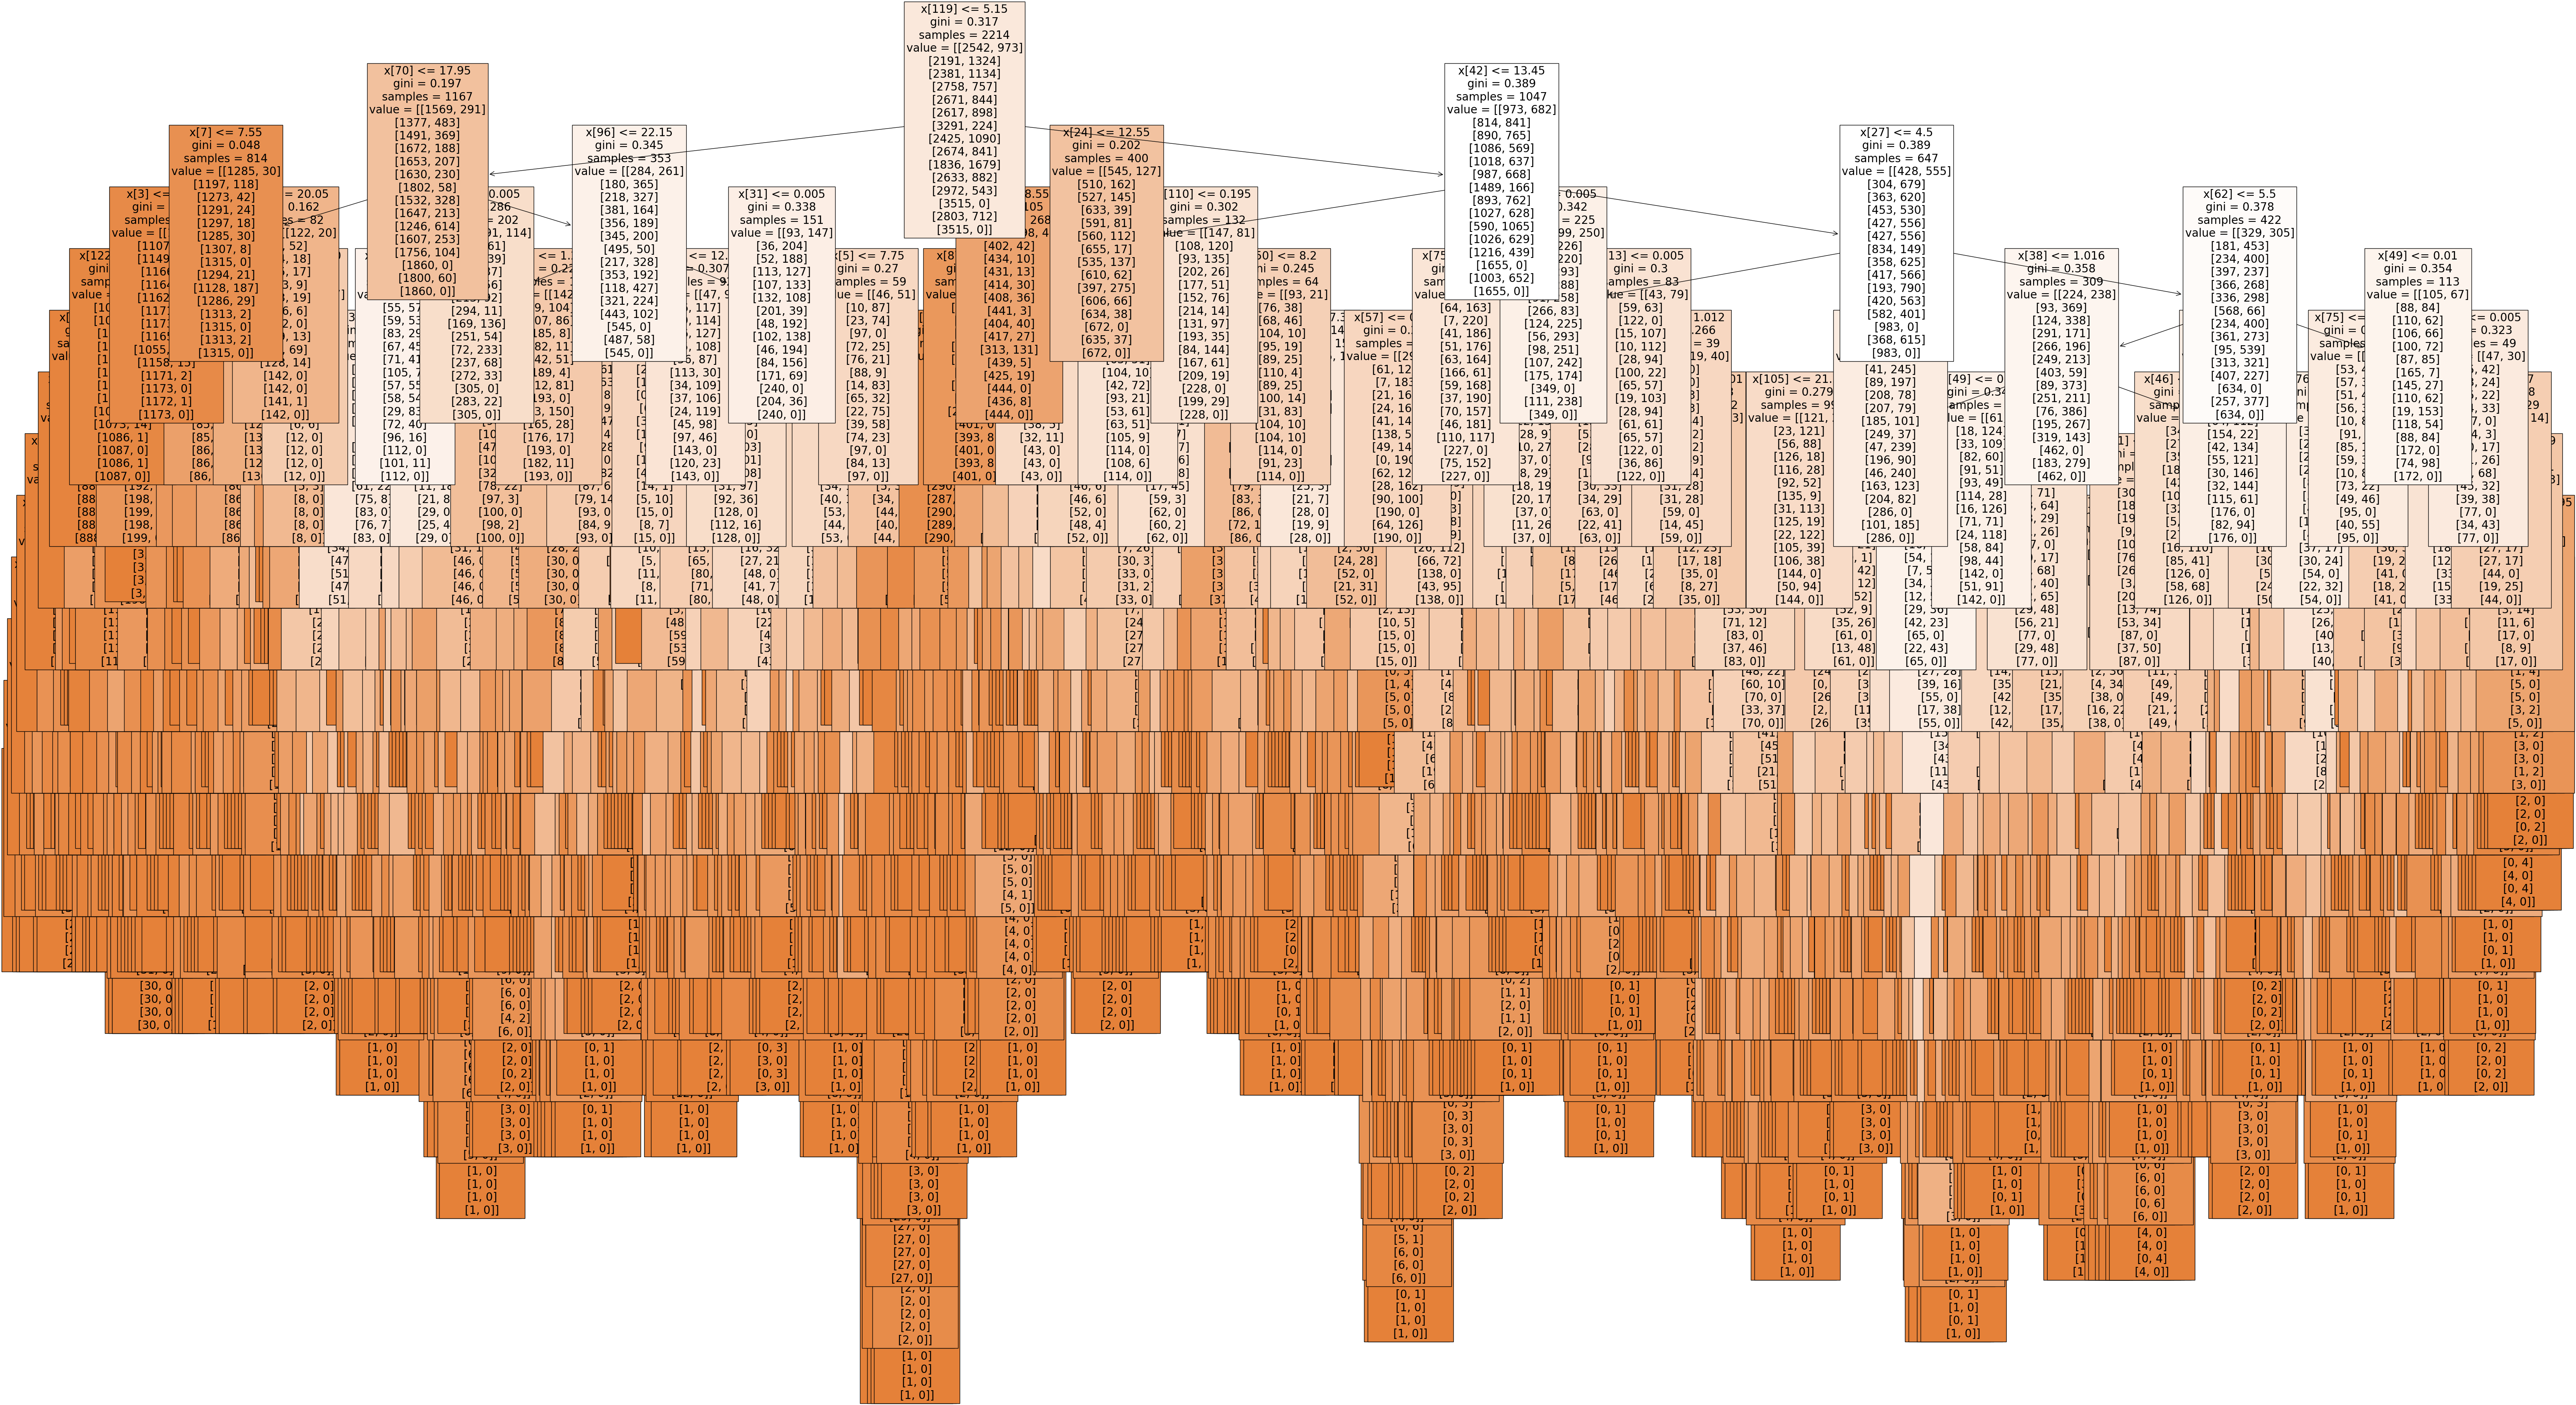

In [126]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

plt.show()

In [128]:
#fig.savefig(os.path.join(path,'optimized_random_forest_2010s.png'), bbox_inches='tight')

### 7. Uncovering Feature Importances

In [133]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_

# Reshape newarray

newarray = newarray.reshape(-1,15,9)

# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)

# Extract stations list

stations = [col.split('_')[0] for col in climate_last12years_clean.columns if '_' in col]

# Create a set of unique station names

unique_stations = set(stations)

# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BELGRADE     0.12
HEATHROW     0.10
KASSEL       0.10
MUNCHENB     0.10
MADRID       0.09
DEBILT       0.09
MAASTRICHT   0.06
LJUBLJANA    0.06
OSLO         0.06
BASEL        0.05
BUDAPEST     0.05
STOCKHOLM    0.04
SONNBLICK    0.03
VALENTIA     0.02
DUSSELDORF   0.01
dtype: float64

In [135]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

In [143]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical', color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.show()

['HEATHROW', 'LJUBLJANA', 'BUDAPEST', 'DEBILT', 'KASSEL', 'OSLO', 'VALENTIA', 'MUNCHENB', 'BELGRADE', 'MAASTRICHT', 'MADRID', 'BASEL', 'SONNBLICK', 'STOCKHOLM', 'DUSSELDORF']


In [145]:
# plt.savefig(os.path.join(path,'optimized_featureimportance_2010s.png'), bbox_inches='tight')

### 8. Hyperparameter Optimization

### Repeating steps

In [154]:
# Create a RF classifier

clf = RandomForestClassifier()

In [156]:
# Grid search cv
grid_space = {
    'max_depth': [3, 5, 10, None],
    'n_estimators': [10, 100, 200],
    'max_features': [1, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

### 9. Run Grid Search

In [159]:
start = time.time()
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid_space,
    scoring='accuracy',
    cv=3,
    verbose=3,
    n_jobs=-2
)
grid_search.fit(X_train, y_train)
print(f"Grid search took {(time.time() - start) / 60:.2f} minutes.")

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Grid search took 2.53 minutes.


In [161]:
# Check the best parameters:

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score achieved:  0.575534897683786


### 10. Evaluate Optimized Model(Grid Search)

In [167]:
best_params = grid_search.best_params_
clf_optimized = RandomForestClassifier(**best_params)
clf_optimized.fit(X_train, y_train)
y_pred = clf_optimized.predict(X_test)
print("Optimized Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Optimized Model Accuracy:  0.6237201365187713


In [169]:
# Define random search cv

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [171]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [173]:
start = time.time()
random_search = RandomizedSearchCV(
    clf2, 
    rs_space, 
    n_iter=10, 
    scoring='accuracy', 
    verbose=3, 
    n_jobs=-1, 
    cv=3)
model_random = random_search.fit(X_train, y_train)
print('Random Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Search took 2.308807830015818 minutes


In [175]:
# Check the best parameters:

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 225}
Best RANDOM search score is: 0.6591723185165971


In [177]:
# Evaluate Optimized Model(Random Search)

best_params = random_search.best_params_
clf_optimized = RandomForestClassifier(**best_params)
clf_optimized.fit(X_train, y_train)
y_pred = clf_optimized.predict(X_test)
print("Optimized Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Optimized Model Accuracy:  0.7150170648464164


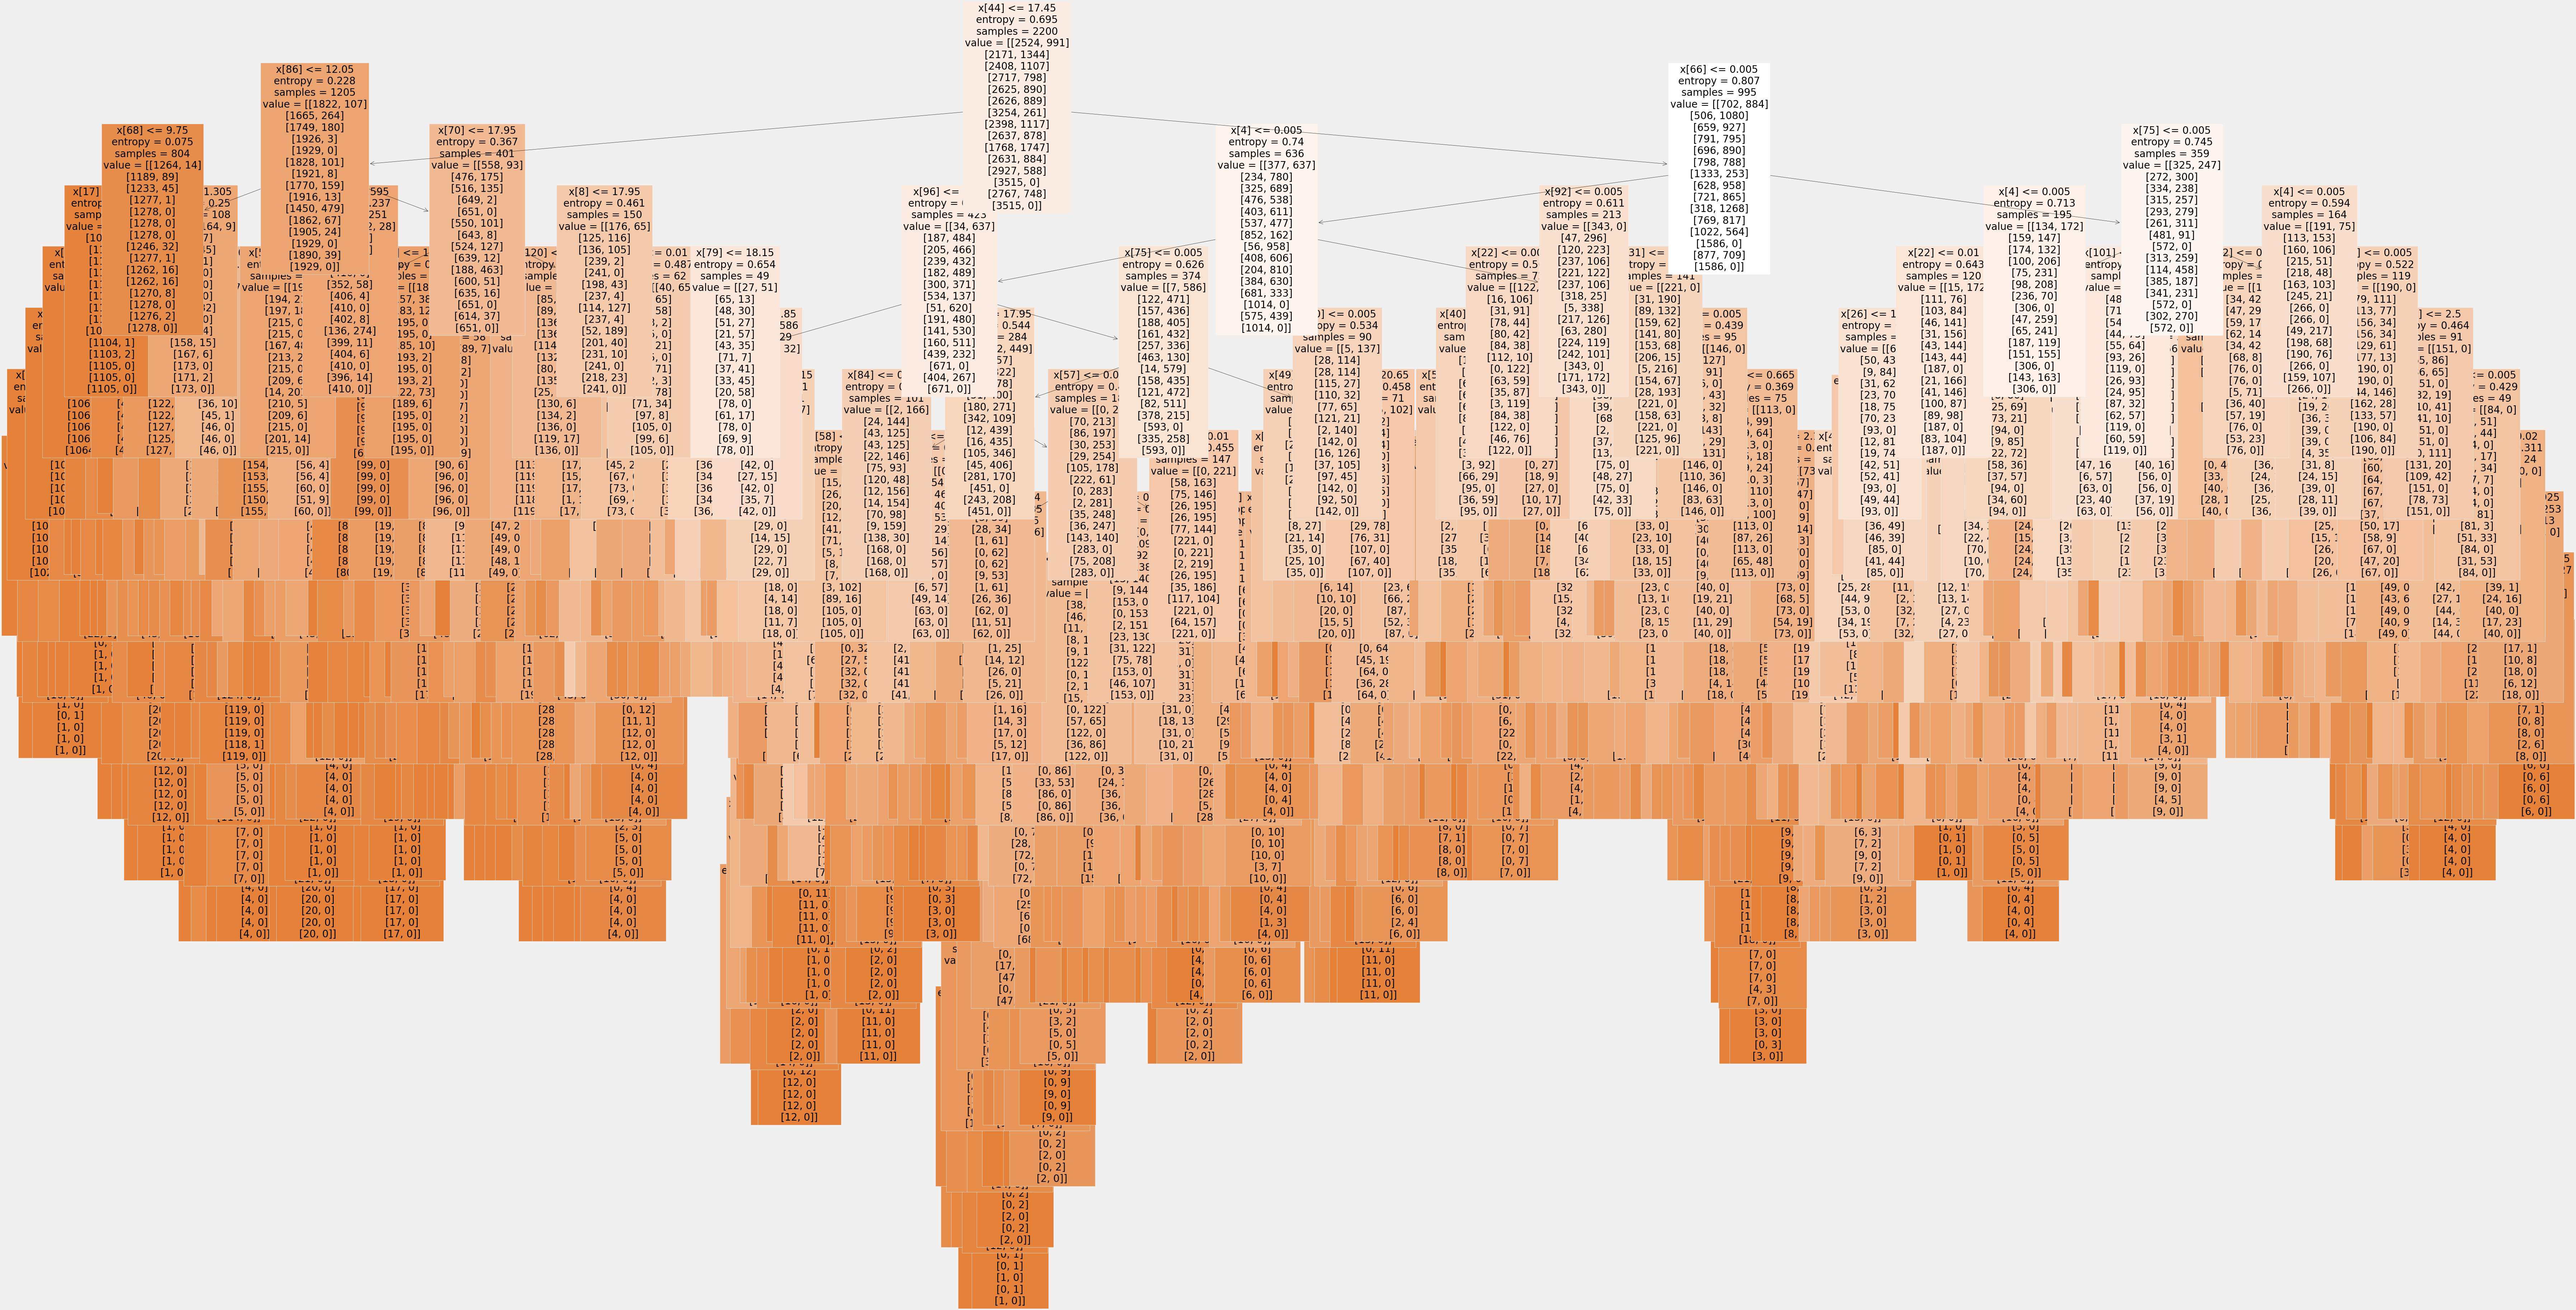

In [179]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf_optimized.estimators_[15], fontsize = 20, filled=True)

plt.show()

In [183]:
# Uncovering Feature Importance

# Retrieve feature importances from the trained model

newarray = clf_optimized.feature_importances_

# Reshape newarray

newarray = newarray.reshape(-1,15,9)

# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)

# Extract stations list

stations = [col.split('_')[0] for col in climate_last12years_clean.columns if '_' in col]

# Create a set of unique station names

unique_stations = set(stations)

# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

KASSEL       0.17
BELGRADE     0.14
HEATHROW     0.11
MUNCHENB     0.09
DEBILT       0.09
MAASTRICHT   0.07
MADRID       0.06
BUDAPEST     0.06
LJUBLJANA    0.06
OSLO         0.04
BASEL        0.04
STOCKHOLM    0.03
VALENTIA     0.02
SONNBLICK    0.01
DUSSELDORF   0.01
dtype: float64

['HEATHROW', 'LJUBLJANA', 'BUDAPEST', 'DEBILT', 'KASSEL', 'OSLO', 'VALENTIA', 'MUNCHENB', 'BELGRADE', 'MAASTRICHT', 'MADRID', 'BASEL', 'SONNBLICK', 'STOCKHOLM', 'DUSSELDORF']


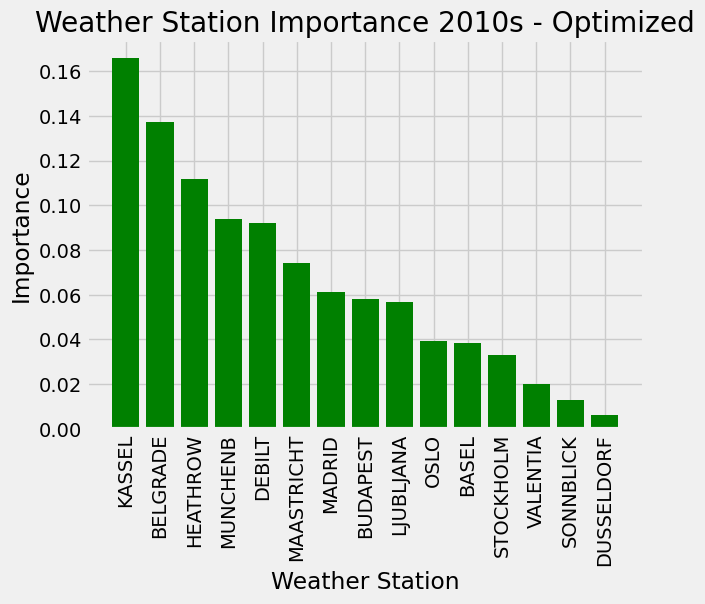

In [187]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical', color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.show()

### Random Forest for Debilt Data (all years)

In [222]:
# Create a list of the columns containing "Debilt" in their names


deb_list = list(x for x in climate_clean.columns if x.find('DEBILT') >=0)

# Create a dataframe with those columns

df_deb = climate_clean[deb_list]
df_deb

DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                       7             0.85             1.00   
1                       8             0.90             1.01   
2                       6             0.92             1.02   
3                       8             0.95             1.03   
4                       6             0.90             1.02   
...                   ...              ...              ...   
22945                   8             0.84             1.02   
22946                   8             0.84             1.02   
22947                   8             0.86             1.02   
22948                   8             0.87             1.02   
22949                   8             0.89             1.02   

       DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                         0.07                  0.25             0.00   
1                         0.14                  0.06             0.10   
2                         0.28                  0.01             3.00   
3                         0.08                  0.09             0.00   
4                         0.04                  0.39             0.00   
...                        ...                   ...              ...   
22945                     1.13                  0.22             2.80   
22946                     1.13                  0.22             3.50   
22947                     1.13                  0.22             3.30   
22948                     1.13                  0.22             6.00   
22949                     1.13                  0.22             0.70   

       DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  
0                  9.30             7.40            11.00  
1                  7.70             6.40             8.30  
2                  6.80             4.60             9.90  
3                  6.70             3.60            10.10  
4                  8.00             2.40            11.20  
...                 ...              ...              ...  
22945             15.70            12.80            19.40  
22946             16.00            10.30            20.50  
22947             15.80             9.30            21.10  
22948             14.40            10.30            20.20  
22949             12.80             6.70            16.20  

[22950 rows x 9 columns]

In [224]:
# Reduce answers dataset to debilt's answers only

answers_deb = answers_clean['DEBILT_pleasant_weather']
answers_deb

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: DEBILT_pleasant_weather, Length: 22950, dtype: int64

In [226]:
# Reshaping for modeling

X = df_deb
y = answers_deb

# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

In [228]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [230]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [232]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [233]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


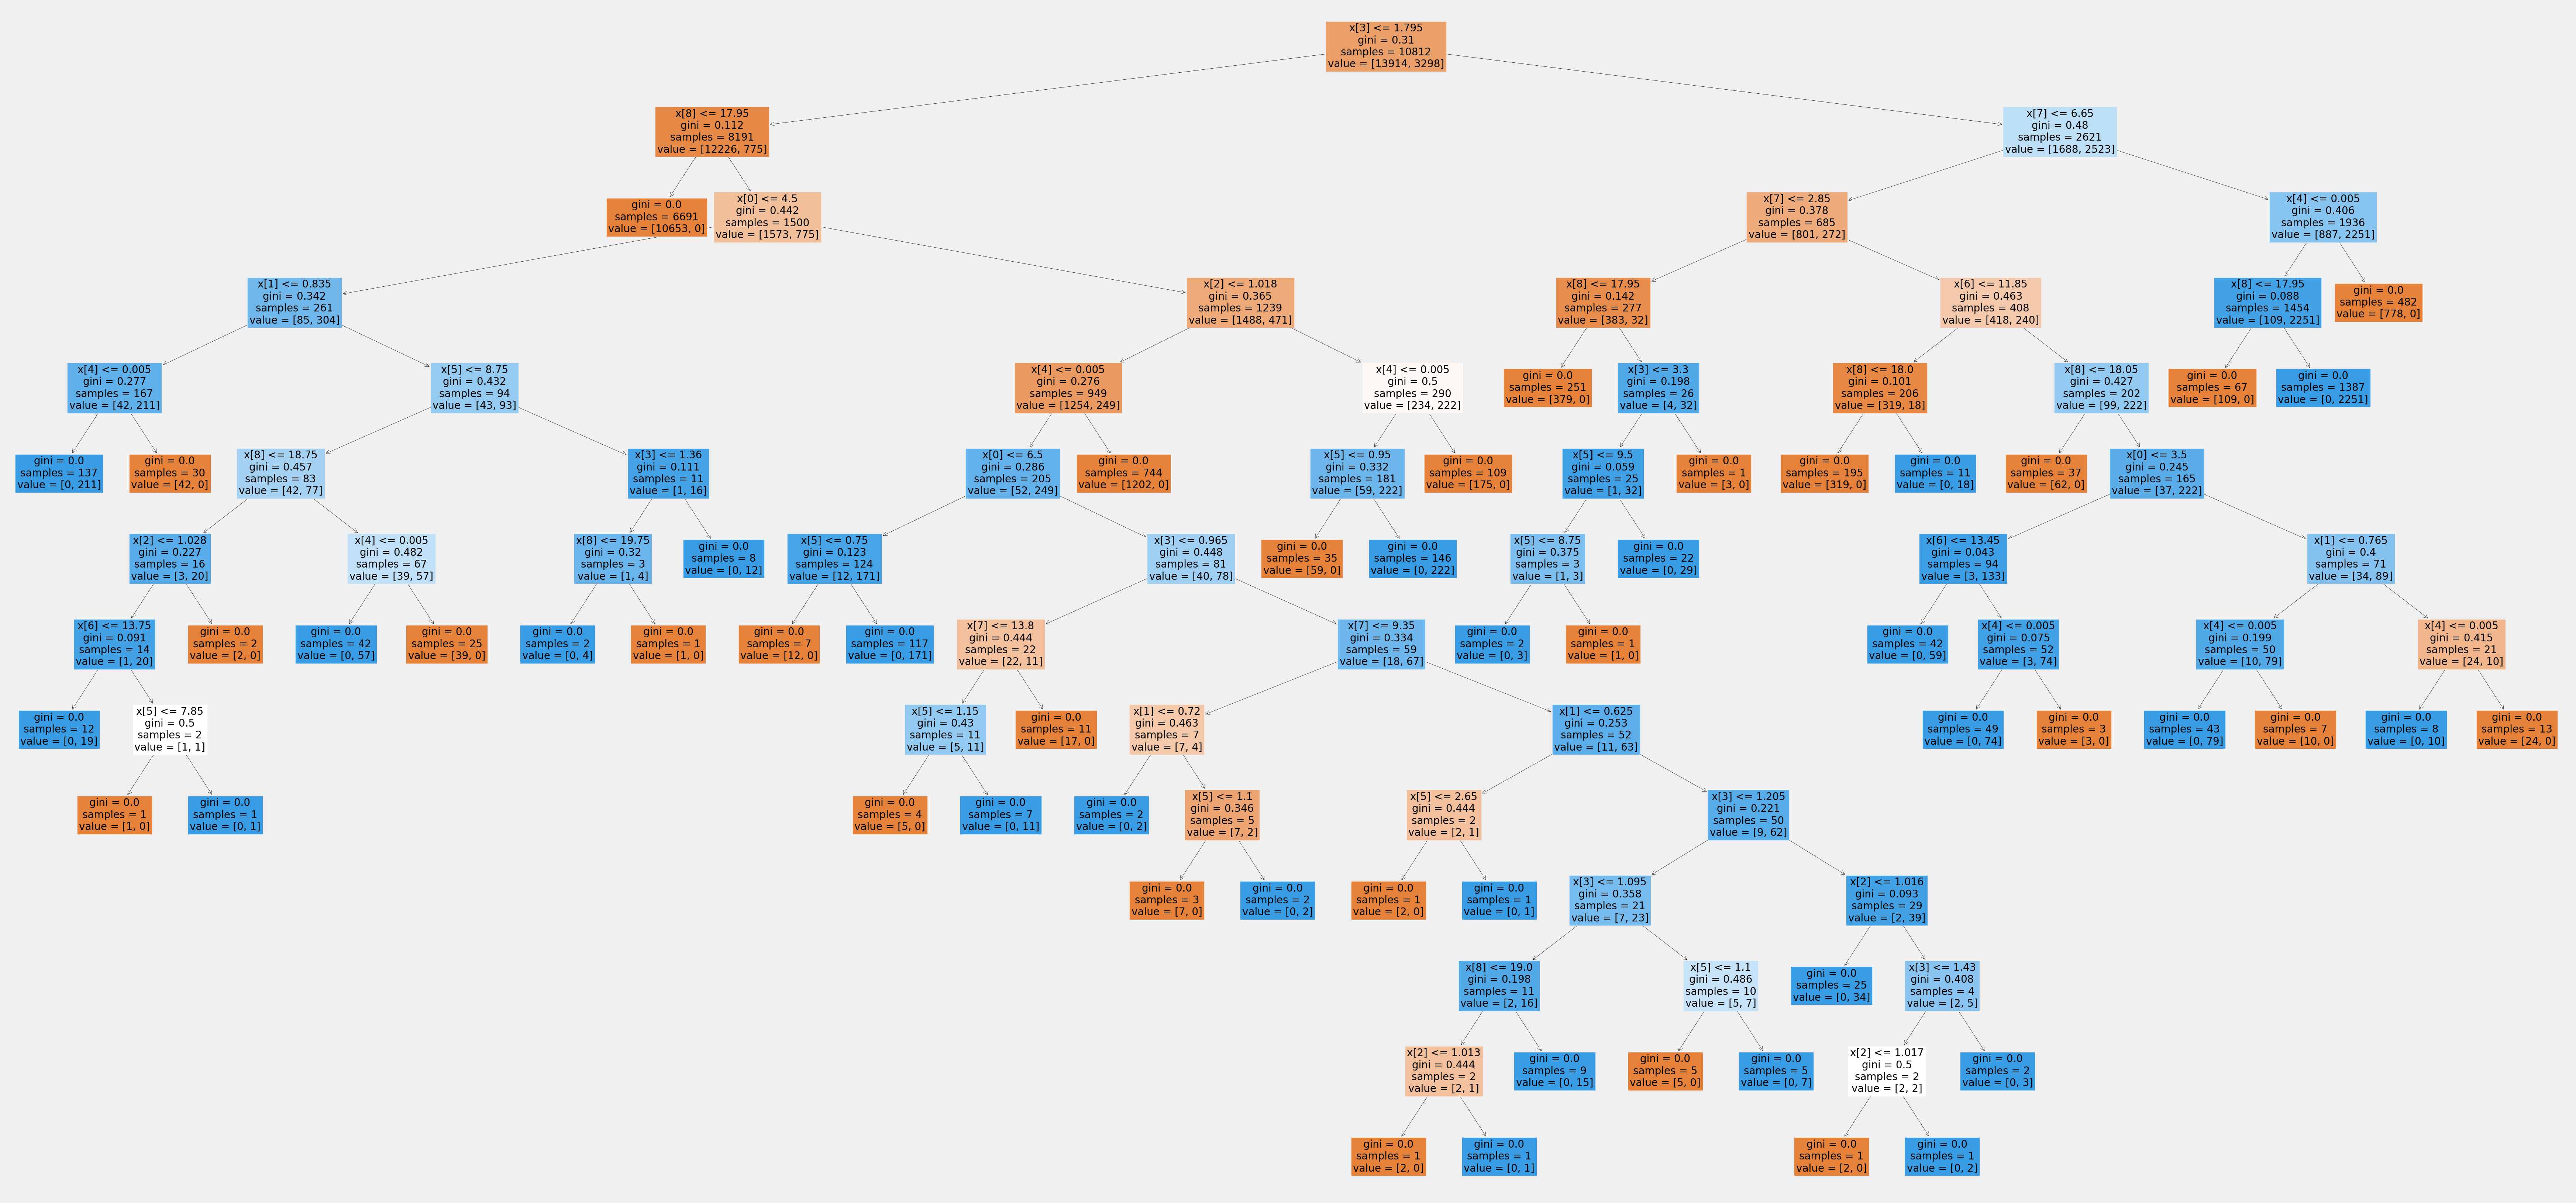

In [236]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True)

plt.show()

In [238]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_

# Create a list of weather features

wx_list = [feature.replace('DEBILT_', '') for feature in deb_list]

important = pd.Series(newarray, index = wx_list).sort_values()

important

humidity           0.01
pressure           0.01
temp_min           0.02
cloud_cover        0.03
sunshine           0.07
global_radiation   0.08
temp_mean          0.17
temp_max           0.27
precipitation      0.34
dtype: float64

In [240]:
# Plot the results

%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance') 
plt.xlabel('Feature') 
plt.title('Features Importances for DEBILT (all years)');


plt.show()

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']
